In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from aggmap import AggMap, show

/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/s

In [2]:
df = pd.read_excel('./elife-55102-supp5-v1.xlsx')

In [3]:
df = df.set_index('ensemble_id')

In [4]:
dfx = df[df.columns[4:]].T

In [6]:
mp = AggMap(dfx, metric='correlation', by_scipy=True)

2021-10-11 15:29:55,516 - INFO - [bidd-aggmap] - Calculating distance ...


100%|##########| 5162/5162 [00:04<00:00, 1261.29it/s]


In [24]:
mp = mp.fit(cluster_channels=6, n_neighbors = 500, spread=2) # 

2021-10-11 15:35:41,547 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
UMAP(a=None, angular_rp_forest=False, b=None, dens_frac=0.0, dens_lambda=0.0,
     dens_var_shift=0.1, densmap=False, disconnection_distance=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=True, metric='precomputed',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None, n_jobs=-1,
     n_neighbors=500, negative_sample_rate=5, output_dens=False,
     output_metric='euclidean', output_metric_kwds=None, random_state=32,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=2,
     target_metric='categorical', target_metric_kwds=None, ...)
Construct fuzzy simplicial set
Mon Oct 11 15:35:42 2021 Finding Nearest Neighbors
Mon Oct 11 15:35:42 2021 Finished Nearest Neighbor Search
Mon Oct 11 15:35:43 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	compl

In [25]:
mp.plot_scatter()
mp.plot_grid()
mp.to_nwk_tree()

2021-10-11 15:37:16,111 - INFO - [bidd-aggmap] - generate file: ./feature points_5162_correlation_umap_scatter
2021-10-11 15:37:16,164 - INFO - [bidd-aggmap] - save html file to ./feature points_5162_correlation_umap_scatter
2021-10-11 15:37:16,166 - INFO - [bidd-aggmap] - generate file: ./feature points_5162_correlation_umap_mp
2021-10-11 15:37:16,211 - INFO - [bidd-aggmap] - save html file to ./feature points_5162_correlation_umap_mp


,TYPE,colors,STYLE
ENSG00000003436,clade,#ffd500,normal
ENSG00000004139,clade,#ffd500,normal
ENSG00000004799,clade,#ffd500,normal
ENSG00000004948,clade,#ffd500,normal
ENSG00000005073,clade,#ffd500,normal
...,...,...,...
ENSG00000280053,clade,#ff00ed,normal
ENSG00000280202,clade,#ff00ed,normal
ENSG00000280206,clade,#ff00ed,normal
ENSG00000283154,clade,#ff00ed,normal


In [26]:
X = mp.batch_transform(dfx.values, scale_method='standard')

100%|##########| 9/9 [00:00<00:00, 30.73it/s]


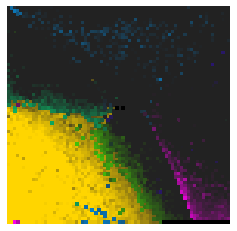

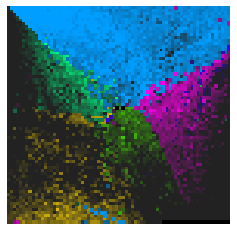

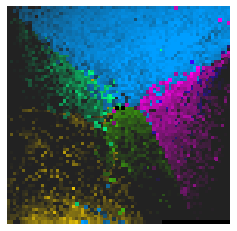

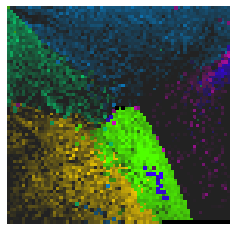

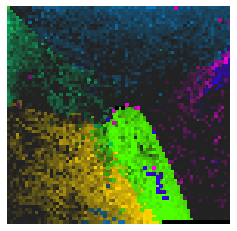

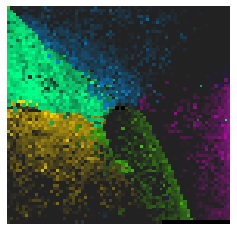

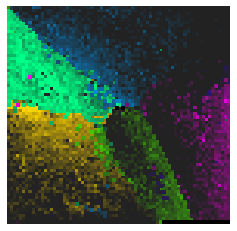

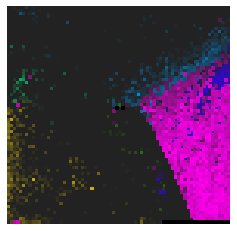

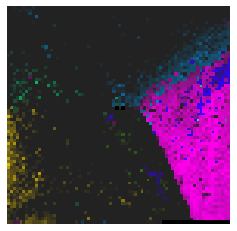

In [37]:
for i in range(9):
    show.imshow_wrap(X[i], color_list=mp.colormaps.values(), x_max=1, vmin=-0.5, vmax=2)

In [39]:
import seaborn as sns

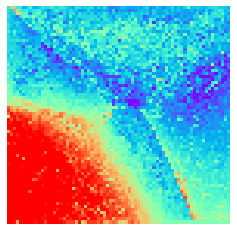

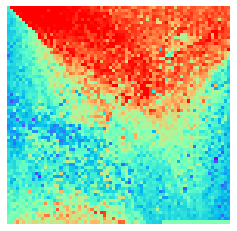

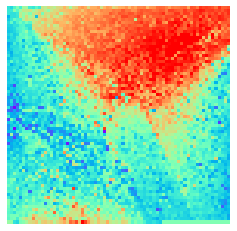

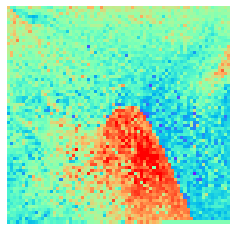

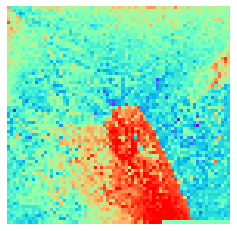

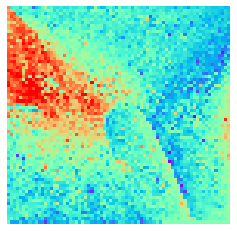

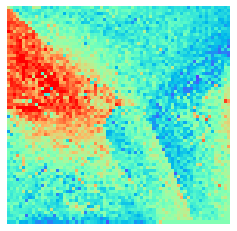

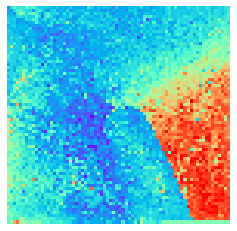

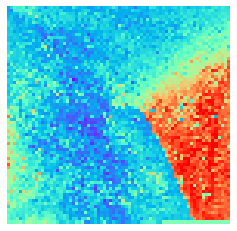

In [56]:
for i in range(9):
    fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(X[i].sum(axis=-1).reshape(*mp.fmap_shape), ax = ax, cmap = 'rainbow', yticklabels=False, xticklabels=False, cbar=False, vmin=-2, vmax=2)

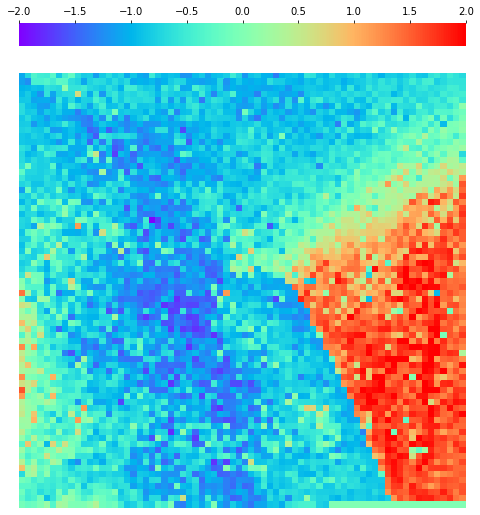

In [60]:
fig, ax = plt.subplots(figsize=(8,10))
sns.heatmap(X[i].sum(axis=-1).reshape(*mp.fmap_shape), ax = ax, cmap = 'rainbow', 
            yticklabels=False, xticklabels=False, cbar=True, vmin=-2, vmax=2,  
            cbar_kws = dict(use_gridspec=False,location="top"))
fig.savefig('legend.pdf')

In [61]:
mp.fmap_shape

(72, 72)

In [62]:
72/2

36.0

In [63]:
dfx.shape

(9, 5162)